In [1]:
# importation of libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline 
import datetime
import warnings

In [2]:
# Apply the configuration to Matplotlib
warnings.filterwarnings('ignore')

sns.set_theme(context='notebook',
              style='white',
              palette='deep',
              font='Lucida Calligraphy',
              font_scale=1.5,
              color_codes=True,
              rc=None)
config = {
    'figure.figsize': (14, 8),
    'figure.facecolor': '#F0F8FF',
    'figure.titlesize': 'medium',
    'figure.dpi': 50,
    'figure.edgecolor': 'green',
    'figure.frameon': True,

    "figure.autolayout": True,

    'axes.facecolor': '#F5F5DC',
    'axes.titlesize': 25,
    "axes.titleweight": 'normal',
    "axes.titlecolor": 'Olive',
    'axes.edgecolor': 'pink',

    "axes.linewidth": 2,
    "axes.grid": True,
    'axes.titlelocation': 'center',
    "axes.labelsize": 20,
    "axes.labelpad": 2,
    'axes.labelweight': 1,
    "axes.labelcolor": 'Olive',
    "axes.axisbelow": False,
    'axes.xmargin': .2,
    "axes.ymargin": .2,
    "xtick.bottom": True,
    'xtick.color': '#A52A2A',
    "ytick.left": True,
    'ytick.color': '#A52A2A',
    'grid.color': 'green',
    'grid.linestyle': '--',
    'grid.linewidth': .5,
    'grid.alpha': .3,
    'legend.loc': 'best',
    'legend.facecolor': 'NavajoWhite',
    'legend.edgecolor': 'pink',
    'legend.shadow': True,
    'legend.fontsize': 20,
    'font.family': 'Lucida Calligraphy',
    'font.size': 14,
}
plt.rcParams.update(config)
pd.set_option('display.max_columns',None)

In [3]:
# Transformer data overview
tf = pd.read_csv('Overview.csv')
display(tf.shape) 
tf.head()

(20316, 8)

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
0,2019-06-25T13:06,0.0,0.0,0.0,37.0,0.0,0.0,0.0
1,2019-06-25T13:09,0.0,0.0,0.0,37.0,0.0,0.0,0.0
2,2019-06-27T10:49,0.0,0.0,0.0,38.0,0.0,0.0,0.0
3,2019-06-27T10:51,0.0,0.0,0.0,38.0,0.0,0.0,0.0
4,2019-06-27T10:52,0.0,0.0,0.0,39.0,0.0,0.0,0.0


In [4]:
# Converting to datetime datatype
tf['DeviceTimeStamp'] = pd.to_datetime(tf['DeviceTimeStamp'], format='%Y-%m-%dT%H:%M')

tf.head()

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
0,2019-06-25 13:06:00,0.0,0.0,0.0,37.0,0.0,0.0,0.0
1,2019-06-25 13:09:00,0.0,0.0,0.0,37.0,0.0,0.0,0.0
2,2019-06-27 10:49:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0
3,2019-06-27 10:51:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0
4,2019-06-27 10:52:00,0.0,0.0,0.0,39.0,0.0,0.0,0.0


In [5]:
# transformer current and voltage overview
cv = pd.read_csv('CurrentVoltage.csv')
display(cv.shape)
cv.head()

(19352, 11)

,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25T13:06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27T10:49,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27T10:51,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27T10:52,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27T10:52,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">Converting to datetime datatype
</span>

In [6]:
# Converting to datetime datatype
cv['DeviceTimeStamp'] = pd.to_datetime(cv['DeviceTimeStamp'], format='%Y-%m-%dT%H:%M')
cv.head()

,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25 13:06:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27 10:49:00,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27 10:51:00,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">Merge both dataframes along DeviceTimeStamp
</span>

In [7]:
# Merge both dataframes along DeviceTimeStamp
transformer = pd.merge(tf, cv, on='DeviceTimeStamp', how='outer')
transformer.sample(5)

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
14168,2019-12-03 09:30:00,23.0,0.0,23.0,100.0,0.0,0.0,0.0,245.7,245.7,243.1,57.5,33.5,56.4,425.2,423.1,424.0,24.1
12097,2019-11-06 22:00:00,28.0,0.0,25.0,94.0,0.0,0.0,0.0,241.0,243.7,240.5,85.3,50.5,85.2,419.7,417.7,416.9,34.8
4594,2019-08-06 03:30:00,29.0,0.0,28.0,40.0,0.0,0.0,1.0,233.3,232.3,234.9,75.3,78.8,86.4,401.5,403.9,406.5,9.6
10446,2019-10-16 02:30:00,27.0,0.0,26.0,64.0,0.0,0.0,0.0,244.9,243.5,243.7,66.4,45.8,67.3,423.3,421.6,423.9,20.8
12552,2019-11-11 05:00:00,22.0,0.0,23.0,99.0,0.0,0.0,0.0,253.8,253.1,250.2,33.2,22.9,44.9,437.4,434.8,437.5,19.3


<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Transformer Parameter Visualization</span>

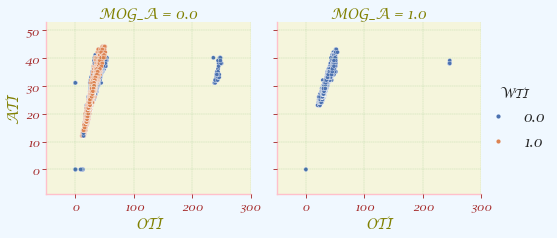

In [8]:
sns.relplot(data=tf, x="OTI", y="ATI", hue="WTI",col="MOG_A")

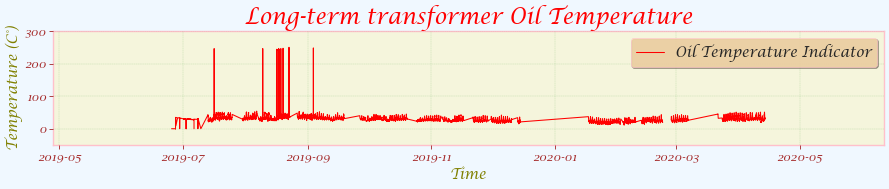

In [9]:
# Oil Temperature
plt.figure(figsize=(18,4))

plt.plot(transformer.DeviceTimeStamp, transformer.OTI, label="Oil Temperature Indicator",color='red')
plt.title("Long-term transformer Oil Temperature",fontsize = 30,color='Red')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Temperature (C°)")
plt.show() 

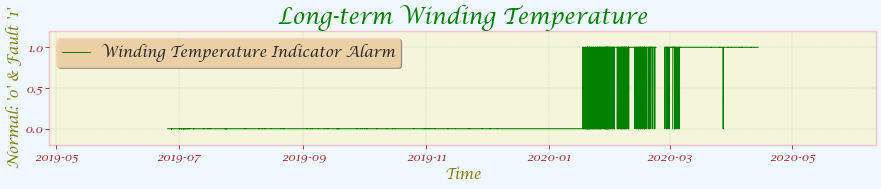

In [10]:
# Winding Temperature Indicator Alarm
plt.figure(figsize=(18,4))

plt.plot(transformer.DeviceTimeStamp, transformer.WTI, label="Winding Temperature Indicator Alarm",color='green')
plt.title("Long-term Winding Temperature",fontsize = 30,color='Green')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Normal: '0' & Fault '1'")
plt.show() 

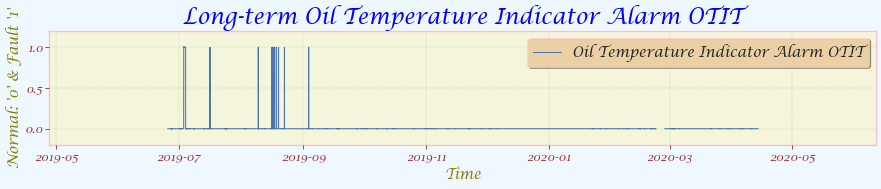

In [11]:
# Oil Temperature Indicator Alarm OTIT

plt.figure(figsize=(18,4))
plt.plot(transformer.DeviceTimeStamp, transformer.OTI_A, label="Oil Temperature Indicator Alarm OTIT")
plt.title("Long-term Oil Temperature Indicator Alarm OTIT",fontsize = 30,color='Blue')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Normal: '0' & Fault '1'")
plt.show() 

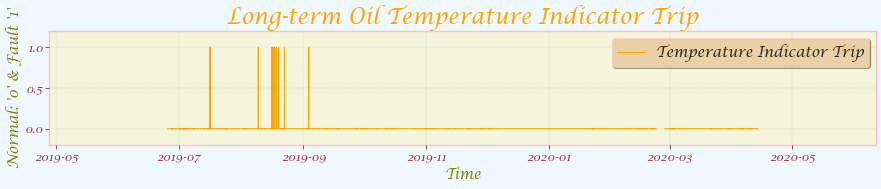

In [12]:
plt.figure(figsize=(18,4))
plt.plot(transformer.DeviceTimeStamp, transformer.OTI_T, label="Temperature Indicator Trip",color='Orange')
plt.title("Long-term Oil Temperature Indicator Trip",fontsize = 30,color='Orange')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Normal: '0' & Fault '1'")
plt.show() 

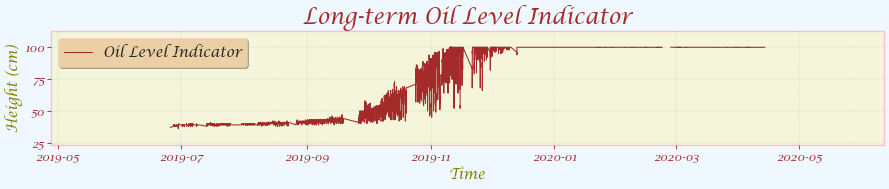

In [13]:
plt.figure(figsize=(18,4))
plt.plot(transformer.DeviceTimeStamp, transformer.OLI, label="Oil Level Indicator",color='Brown')
plt.title("Long-term Oil Level Indicator",fontsize = 30,color='Brown')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Height (cm)")
plt.show() 

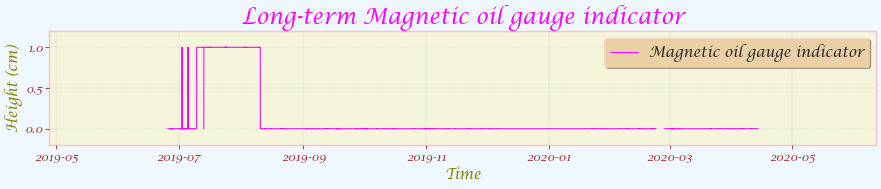

In [14]:
plt.figure(figsize=(18,4))

plt.plot(transformer.DeviceTimeStamp, transformer.MOG_A, label="Magnetic oil gauge indicator",color='Magenta')
plt.title("Long-term Magnetic oil gauge indicator",fontsize = 30,color='Magenta')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Height (cm)")
plt.show() 

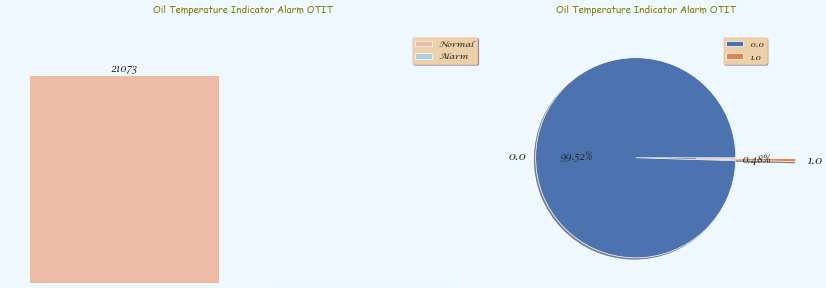

In [15]:
plt.rcParams['legend.fontsize'] = 12
plt.rcParams["axes.labelsize"] = 20

plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='OTI_A', data=transformer, palette='RdBu')
ax.bar_label(ax.containers[0])
plt.title("Oil Temperature Indicator Alarm OTIT", fontsize=20,color='Olive',font='Comic Sans MS',pad=30)
plt.legend(labels=['Normal','Alarm'])
plt.axis('off');

ax =plt.subplot(1,2,2)
ax=transformer['OTI_A'].value_counts().plot.pie(explode=[0.1, 0.5],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Oil Temperature Indicator Alarm OTIT", fontsize = 20,color='Olive',font='Comic Sans MS',pad= 30);
plt.legend()
plt.axis('off');

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

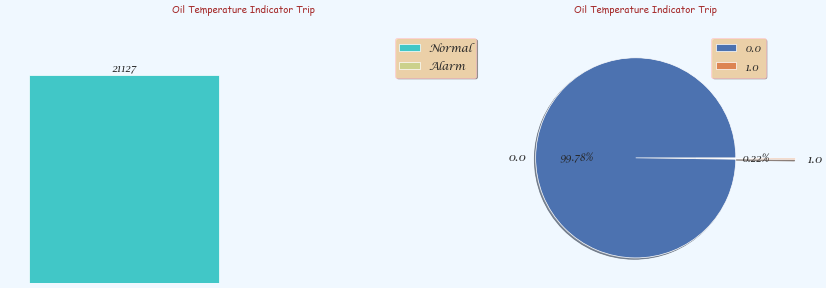

In [16]:
plt.rcParams['legend.fontsize'] = 15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.labelcolor"] = 'brown'

plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='OTI_T', data=transformer, palette='rainbow')
ax.bar_label(ax.containers[0])
plt.title("Oil Temperature Indicator Trip", fontsize=30,color='Brown',font='Comic Sans MS',pad=30)
plt.legend(labels=['Normal','Alarm'])
plt.axis('off')

ax =plt.subplot(1,2,2)
ax=transformer['OTI_T'].value_counts().plot.pie(explode=[0.1, 0.5],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Oil Temperature Indicator Trip", fontsize = 30,color='Brown',font='Comic Sans MS',pad= 30);
plt.legend()
plt.axis('off')

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

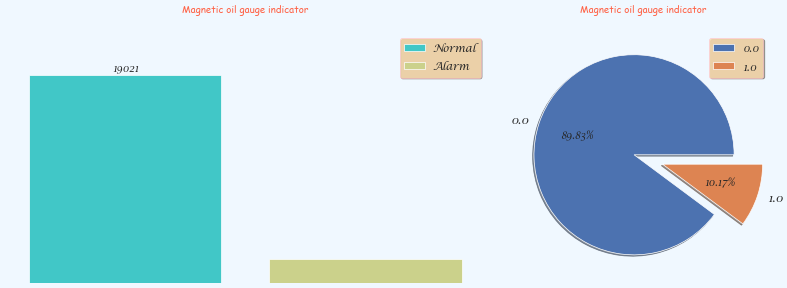

In [17]:
plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='MOG_A', data=transformer, palette='rainbow')
ax.bar_label(ax.containers[0])
plt.title("Magnetic oil gauge indicator", fontsize=30,color='Tomato',font='Comic Sans MS',pad=30)
plt.legend(labels=['Normal','Alarm'])
plt.axis('off')

ax =plt.subplot(1,2,2)
ax=transformer['MOG_A'].value_counts().plot.pie(explode=[0.1, 0.2],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Magnetic oil gauge indicator", fontsize = 30,color='Tomato',font='Comic Sans MS',pad= 30);
plt.legend()
plt.axis('off')

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Train Test Split</span>

In [18]:
X = transformer.drop(['DeviceTimeStamp','MOG_A'],axis=1).fillna(0)

y = transformer['MOG_A'].fillna(0)


X.head()

,OTI,WTI,ATI,OLI,OTI_A,OTI_T,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,38.0,0.0,0.0,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,38.0,0.0,0.0,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,39.0,0.0,0.0,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=21)
X_train.head()

,OTI,WTI,ATI,OLI,OTI_A,OTI_T,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
12880,26.0,0.0,26.0,97.0,0.0,0.0,245.7,244.4,243.1,39.1,32.7,51.6,424.2,422.1,424.0,19.8
13961,25.0,0.0,25.0,100.0,0.0,0.0,247.2,246.2,244.2,66.7,44.5,61.0,427.5,425.0,426.4,19.9
617,33.0,0.0,34.0,39.0,0.0,0.0,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7449,40.0,0.0,35.0,41.0,0.0,0.0,236.7,234.9,236.3,83.6,89.0,92.0,407.9,407.2,410.3,7.2
3816,35.0,0.0,31.0,39.0,0.0,0.0,235.2,234.1,235.3,60.9,51.5,75.1,404.4,404.1,407.0,23.4


<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Normalizing the data</span>

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<div style="color:white;background-color:Red;padding:2%;border-radius:150px 150px;font-size:3em;text-align:center">Model Implementation</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:33px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 15px;
              color:white;">
            <b>1. RandomForestClassifier</b>
        </p>
</div>

In [85]:
testing_accuracy= "Testing Accuracy :"
training_accuracy="Training Accuracy :"
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt  # Import for plotting
from sklearn.model_selection import train_test_split
import sklearn.ensemble


In [71]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Create a Random Forest Classifier with 100 estimators
random_forest = RandomForestClassifier(n_estimators=100)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test)

# Calculate training and testing accuracy
random_forest_train_accuracy = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_test_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

# Print training and testing accuracy with color escape sequences
print(f"\033[1mTraining Accuracy:\033[0m {random_forest_train_accuracy:.4f}%")
print(f"\033[1mTesting Accuracy:\033[0m {random_forest_test_accuracy:.4f}%")

# Print classification report with clear formatting
print("\n\033[1mClassification Report:\033[0m")
print(classification_report(y_test, y_pred_rf))



Training Accuracy: 99.9600%
Testing Accuracy: 98.3600%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3826
         1.0       0.90      0.95      0.92       447

    accuracy                           0.98      4273
   macro avg       0.95      0.97      0.96      4273
weighted avg       0.98      0.98      0.98      4273



<span style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px ">Random Forest confusion matrix</span>

<Figure size 450x350 with 0 Axes>

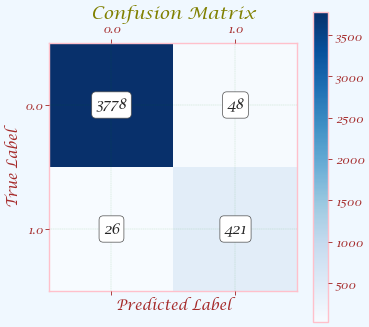

In [67]:
cm = confusion_matrix(y_test, y_pred_rf)

# Create and display the confusion matrix with informative labels and colormap
plt.figure(figsize=(9, 7))  # Adjust figure size as desired
plt.matshow(cm, cmap=plt.cm.Blues)  # Adjust colormap as desired
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=20, bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(range(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(range(len(np.unique(y_test))), np.unique(y_test))
plt.show()

<span style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px ">Calculate Random Forest F1-score, recall, and precision</span>

In [65]:
# Calculate F1-score, recall, and precision
from sklearn.metrics import f1_score, recall_score, precision_score

random_forest_f1 = f1_score(y_test, y_pred_rf, average='weighted')
random_forest_recall = recall_score(y_test, y_pred_rf, average='weighted')
random_forest_precision = precision_score(y_test, y_pred_rf, average='weighted')

# Print F1-score, recall, and precision with labels
print("\n\033[1mF1-score:\033[0m", f"{random_forest_f1:.4f}")  
print("\033[1mRecall:\033[0m", f"{random_forest_recall:.4f}") 
print("\033[1mPrecision:\033[0m", f"{random_forest_precision:.4f}") 


F1-score: 0.9847
Recall: 0.9846
Precision: 0.9851


<span style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px ">Random Forest ROC Curve</span>

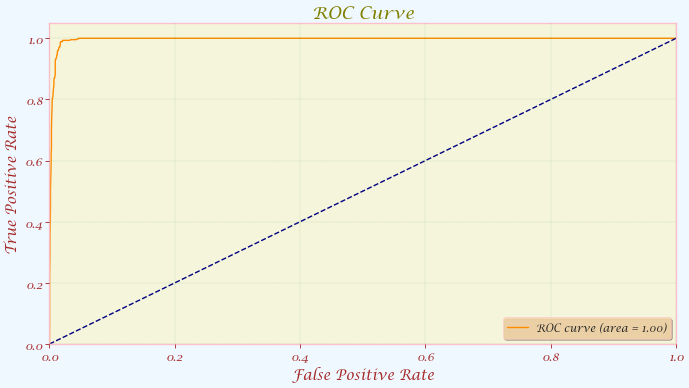

In [82]:
# ROC Curve (replace 'y_score' with your actual predicted probabilities if needed)
from sklearn.metrics import roc_curve, auc

y_score = random_forest.predict_proba(X_test)[:, 1]  # Assuming binary classification

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:33px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 15px;
              color:white;">
            <b>2. XGB Classifier</b>
        </p>
</div>

In [86]:
import xgboost as Xgb
xgb = Xgb.XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
xgb.score(X_train, y_train)

xgb_train_accuracy = round(xgb.score(X_train, y_train) * 100, 2)
xgb_test_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)

print(training_accuracy,xgb_train_accuracy ,"%")
print(testing_accuracy,xgb_test_accuracy ,"%")
print("\033[1m\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))



Training Accuracy : 99.94 %
Testing Accuracy : 98.53 %

Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3826
         1.0       0.91      0.95      0.93       447

    accuracy                           0.99      4273
   macro avg       0.95      0.97      0.96      4273
weighted avg       0.99      0.99      0.99      4273



<span style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px ">Calculate XGBoost F1-score, recall, and precision</span>

In [84]:
# Calculate F1-score, recall, and precision
from sklearn.metrics import f1_score, recall_score, precision_score

xgb_f1 = f1_score(y_test, y_pred_xgb, average='weighted')
xgb_recall = recall_score(y_test, y_pred_xgb, average='weighted')
xgb_precision = precision_score(y_test, y_pred_xgb, average='weighted')

# Print F1-score, recall, and precision with labels
print("\n\033[1mF1-score:\033[0m", f"{xgb_f1:.4f}")  
print("\033[1mRecall:\033[0m", f"{xgb_recall:.4f}") 
print("\033[1mPrecision:\033[0m", f"{xgb_precision:.4f}") 


F1-score: 0.9854
Recall: 0.9853
Precision: 0.9857


<span style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px ">XGBoost confusion matrix</span>

<Figure size 450x350 with 0 Axes>

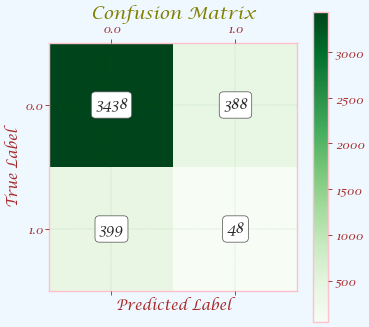

In [72]:
cm = confusion_matrix(y_test, y_pred_xgb)

# Create and display the confusion matrix with informative labels and colormap
plt.figure(figsize=(9, 7))  # Adjust figure size as desired
plt.matshow(cm, cmap=plt.cm.Greens)  
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=20, bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(range(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(range(len(np.unique(y_test))), np.unique(y_test))
plt.show()

<span style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px ">XGBoost ROC Curve</span>

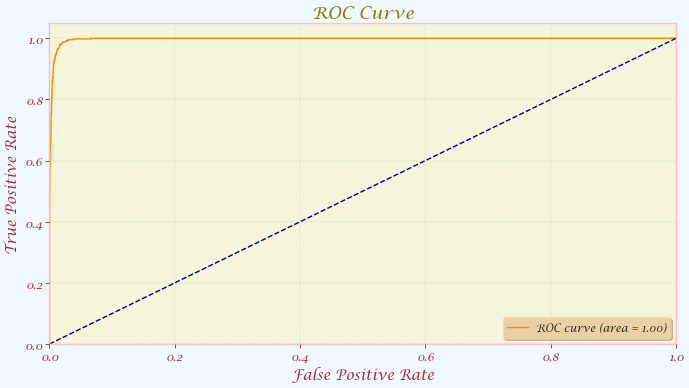

In [83]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

y_score = xgb.predict_proba(X_test)[:, 1]  #  binary classification

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()

<div style="display:fill;
            border-radius:15px;
            background-color:cyan;
            font-size:270%;
            font-family:Vardana;
            letter-spacing:0.5px;
            padding:10px;
            color:Red;
            border-style: solid;
            border-color: red;
            text-align:center;">
<b>Comparing Multiple Models</b>
</div>

In [91]:
models = pd.DataFrame({
    'Model': [
        'Random Forest','XGBClassifier'
    ],
    'Training Accuracy': [
        random_forest_train_accuracy,
        xgb_train_accuracy
    ],
    'Testing Accuracy Score': [
        random_forest_test_accuracy,
        xgb_test_accuracy
    ],
     'F1 Score': [
        random_forest_f1,
        xgb_f1
    ],
     'Precision': [
        random_forest_precision,
        xgb_precision
    ]
    , 'Recall': [
        random_forest_recall,
        xgb_recall
    ]
})


In [92]:
# pd.set_option('precision',1)
print("model accuracy table")
models.sort_values(by='Testing Accuracy Score', ascending=False)

model accuracy table


,Model,Training Accuracy,Testing Accuracy Score,F1 Score,Precision,Recall
1,XGBClassifier,99.94,98.53,0.985405,0.985670,0.985256
0,Random Forest,99.96,98.36,0.984746,0.985114,0.984554


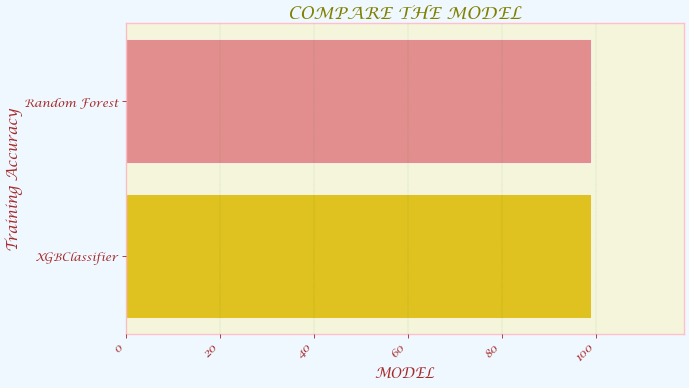

In [40]:

# models DataFrame has columns 'Model' and 'Model Accuracy Score'
models=models.sort_values(by='Model Accuracy Score',ascending=False)[:2]
# Define a color palette 
colors = [ 'lightcoral',  'gold']

# Create the barplot with different colors
sns.barplot(y='Model', x='Model Accuracy Score', data=models, palette=colors)

# Customize the plot
plt.title('COMPARE THE MODEL')
plt.xlabel('MODEL')
plt.ylabel('Training Accuracy')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the plot
plt.show()


<h2><b>Cross Checking XGBoost</b></h2>

In [27]:
prediction_xgb = xgb.predict(X_test)
print(prediction_xgb)


[0 0 0 ... 0 0 0]


In [30]:
cross_checking_rf= pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction_xgb})
cross_checking_rf.sample(20).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LightBlue',
            'font-size': '15px'
        })


,Actual,Predicted
12155,0.000000,0
17263,0.000000,0
16122,0.000000,0
14416,0.000000,0
17115,0.000000,0
17079,0.000000,0
14057,0.000000,0
1314,0.000000,0
11935,0.000000,0
6036,0.000000,0


<h2><b>Cross Checking Random Forest</b></h2>

In [41]:
prediction_rf = random_forest.predict(X_test)
print(prediction_rf)

[0. 0. 0. ... 0. 0. 0.]


In [33]:

cross_checking_rf= pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction_rf})
cross_checking_rf.sample(20).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LightBlue',
            'font-size': '15px'
        })

,Actual,Predicted
5491,0.000000,0.000000
17753,0.000000,0.000000
1919,0.000000,0.000000
19683,0.000000,0.000000
7003,0.000000,0.000000
1549,0.000000,0.000000
13553,0.000000,0.000000
10534,0.000000,0.000000
473,0.000000,0.000000
9521,0.000000,0.000000
